# Classification forecast of kyphosis (individuals wth curved backbones)
target (column 0) - predict whether the person has kyphosis or not

features (column 1 to 3) - the other three parameters for prediction

For the age in column 1, the unit being used is in monthly

In [181]:
# import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [182]:
# Read dataset from GitHub
! git clone https://github.com/PrefaceCoding/M3L5

fatal: destination path 'M3L5' already exists and is not an empty directory.


In [183]:
# Read the first five rows of the csv data file
df = pd.read_csv("M3L5/kyphosis.csv")
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [184]:
# Look at the quick statitic summary of the data to see if there are anomalies
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


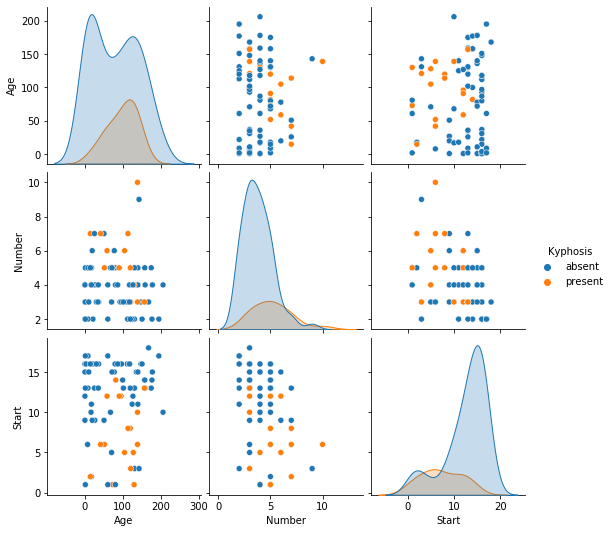

In [185]:
# Plot pairwise relationships in the dataset
# each variable in the data are shared by the same y-axis across a row and x-axis across a column
sns.pairplot(df, hue = 'Kyphosis')

In [186]:
# Change the monthly age to yearly
df["Age"]/=12
df.head()

,Kyphosis,Age,Number,Start
0,absent,5.916667,3,5
1,absent,13.166667,3,14
2,present,10.666667,4,5
3,absent,0.166667,5,1
4,absent,0.083333,4,15


In [187]:
# Get the features and the target
X = df.drop("Kyphosis", axis = 1)
y = df["Kyphosis"]

In [188]:
# step 1: data preparation 
# spliting into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

X_train.head()

,Age,Number,Start
61,9.500000,7,8
73,17.166667,4,10
67,13.250000,4,13
26,0.666667,3,6
79,3.500000,7,6


In [189]:
# step 2: model selction 
from sklearn.ensemble import RandomForestClassifier

# instantiate
rfc = RandomForestClassifier(n_estimators=50, random_state=1)

In [190]:
# step 3: model training
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

In [191]:
# step 4: model prediction
y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)

y_test_pred == y_test

63    True 
27    True 
31    True 
69    True 
46    True 
47    True 
53    True 
76    False
39    False
74    True 
34    True 
62    True 
36    True 
40    False
58    False
10    False
38    False
2     False
35    True 
33    True 
45    False
15    True 
66    True 
56    True 
19    True 
Name: Kyphosis, dtype: bool

In [192]:
# step 5: evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### show the confusion matrix
#                                      actual value (absent/present)
# predicted value [[count of true negatives TN, count of false positives FP]
# (absent/present) [count of false negatives FN, count of true positives TP]]
confusion_matrix(y_test, y_test_pred)

array([[17,  2],
       [ 6,  0]], dtype=int64)

In [193]:
# Show the distribution of the testing data
y_test.value_counts(normalize=True)

absent     0.76
present    0.24
Name: Kyphosis, dtype: float64

In [194]:
# Show a classfication report for the test data result
# In this example, absent is the positive and presence is the negative
print(classification_report(y_test,y_test_pred))

# precision - how precise your predictions are (think about prediction as the base) -->  TN/(TN+FN) = 12/(12+6) for absent, TP/(TP+FP) = 2/(2+5) for present
# recall - how complete your predictions are (think about truth as the base) --> TN/(TN+FP) = 12/(12+5) for absent, TP/(TP+FN) = 2/(2+6) for present
# f1 score - harmonic mean of precision and recall --> 2*precision*recall / (precision+recall)
# overfitting - trained model work great in its used data but lack of flexibility when encounter new data

              precision    recall  f1-score   support

      absent       0.74      0.89      0.81        19
     present       0.00      0.00      0.00         6

    accuracy                           0.68        25
   macro avg       0.37      0.45      0.40        25
weighted avg       0.56      0.68      0.62        25



In [195]:
# Show a classfication report for the train data result
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        45
     present       1.00      1.00      1.00        11

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56



In [196]:
# Show the feature importance
rfc.feature_importances_

array([0.30617995, 0.27233229, 0.42148776])

Text(0.5, 0, 'Random Forest Feature Importance')

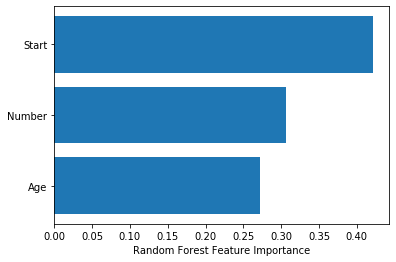

In [197]:
# Sort the features according to their importance
sorted_idx = rfc.feature_importances_.argsort()
plt.barh(X_train.columns, rfc.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

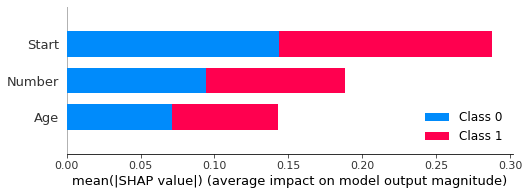

In [198]:
# Alternatively, the SHAP interpretation can be used (it is model-agnostic) to compute the feature importances from the Random Forest. 
# It is using the Shapley values from game theory to estimate the how does each feature contribute to the prediction
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

###  This simple random forest model outputs the train data model with 100% accuracy (100 % precison and recall) and the test data model with 68% accuracy 

### This model can be further optimized by hyperparameter tuning

Train score: 1.0
Test score: 0.68

Train confusion matrix


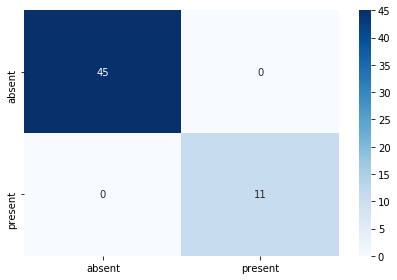


Test confusion matrix


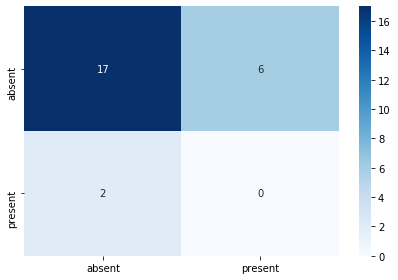

In [199]:
# function to plot a more fansy confusion matrix
classes = ['absent','present']

def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'\n{dom} confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()
    
print(f'Train score: {accuracy_score(y_train_pred,y_train)}')
print(f'Test score: {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

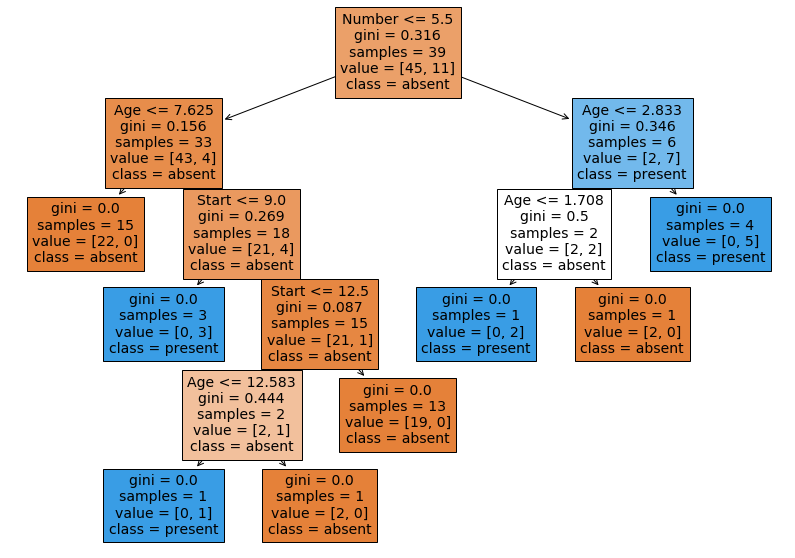

In [200]:
# visualizing the first tree in the random forest
from sklearn import tree
plt.figure(figsize=(14,10))

tree.plot_tree(rfc.estimators_[0], filled = True, feature_names=X.columns, class_names=["absent","present"])
plt.show()

# Hyperparameter tuning for Random Forest

### 1. GridSearchCV

In [201]:
import time
start = time.time()
rfc_1 = RandomForestClassifier(n_jobs=-1)

params = {'max_features': [None, 'sqrt', 'log2'], # max_features= n_features, sqrt(n_features), log2(n_features)
          'min_samples_leaf': [1,2,3],
          'n_estimators': [10,25,50,100,150,200,500],
          # 'oob_score': [True, False]
         }

from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
gcv = GridSearchCV(estimator=rfc_1,
                           param_grid=params,
                           cv = 4,        # cv = 4 means the models are trained with k-1 folds of cross-validation as smaller training data, 
                                             # resulting model is validated on the remaining part of the data
                                             # the final result is just their average computed values
                           n_jobs=-1)

gcv.fit(X_train, y_train)
end = time.time()
print(f'The elapsed time is {end-start:0.1f} seconds.')

The elapsed time is 54.9 seconds.


In [202]:
# print out the best parameters
model_1 = gcv.best_estimator_
model_1

RandomForestClassifier(max_features=None, min_samples_leaf=3, n_estimators=200,
                       n_jobs=-1)

### This time, the train data model has 98% accuracy and the test data model has a 72% accuracy

### The hyperparameter tuning by GridSearchCV can improve the model performace! 

Train score 0.9464285714285714
Test score 0.72

Train confusion matrix


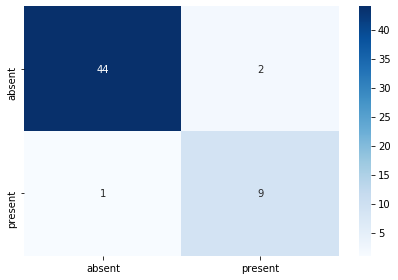


Test confusion matrix


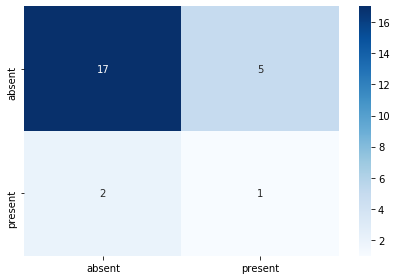

In [203]:
# Evaluate the result
model_1.fit(X_train,y_train)
gcv_y_train_pred = model_1.predict(X_train)
gcv_y_test_pred = model_1.predict(X_test)

print(f'Train score {accuracy_score(gcv_y_train_pred,y_train)}')
print(f'Test score {accuracy_score(gcv_y_test_pred,y_test)}')
plot_confusionmatrix(gcv_y_train_pred,y_train,dom='Train')
plot_confusionmatrix(gcv_y_test_pred,y_test,dom='Test')

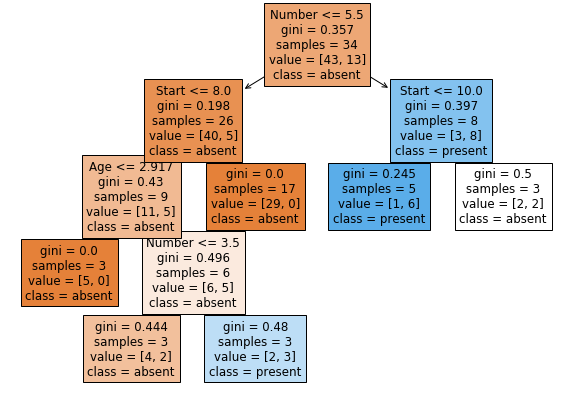

In [204]:
# PLot the an example tree from the "optimized" random forest model
plt.figure(figsize=(10,7))
tree.plot_tree(model_1.estimators_[2], filled = True, feature_names=X.columns, class_names=["absent","present"])
plt.show()

In [205]:
# Show the feature importance
model_1.feature_importances_

array([0.17207032, 0.29898436, 0.52894532])

In [206]:
# Sort the features according to their importance
imp_df = pd.DataFrame({
    "Parameter Name": X_train.columns,
    "Importance": model_1.feature_importances_
})
imp_df.sort_values(by="Importance", ascending=False)

,Parameter Name,Importance
2,Start,0.528945
1,Number,0.298984
0,Age,0.172070


# 2. Random Search

In [207]:
import time
from scipy.stats import uniform, truncnorm, randint
# truncnorm(a=1, b=3, loc=2, scale=0.1) <- normally distributed values, with mean 0.25 stddev 0.1, bounded between 0 and 1
start = time.time()
rfc_2 = RandomForestClassifier(n_jobs=-1)

rcv_params = {
    # randomly sample numbers from 10 to 20 estimators
    'n_estimators': randint(10,200),
    'max_features': [None, 'sqrt', 'log2'],
    'min_samples_leaf': randint(1,3)
    # truncnorm(a=1, b=3, loc=2, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    # ,'oob_score': [True, False]
}

# create random forest classifier model
from sklearn.model_selection import RandomizedSearchCV

# set up random search meta-estimator
# this will train 10 models over cv=4 folds of cross validation (40 models total)
rcv = RandomizedSearchCV(rfc_2, rcv_params, n_iter=10, cv=4)

# train the random search meta-estimator to find the best model out of 100 candidates
rcv_model = rcv.fit(X, y)

# print winning set of hyperparameters
from pprint import pprint
pprint(rcv_model.best_estimator_.get_params())
end = time.time()
print(f'The elapsed time is {end-start:0.1f} seconds.')

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 189,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
The elapsed time is 15.7 seconds.


### This time, the train data model has 95% accuracy and the test data model has a 72% accuracy

### The hyperparameter tuning by RandomSearchCV did not make an improvement this time 

Train score 0.9464285714285714
Test score 0.68

Train confusion matrix


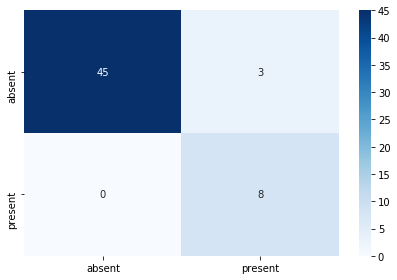


Test confusion matrix


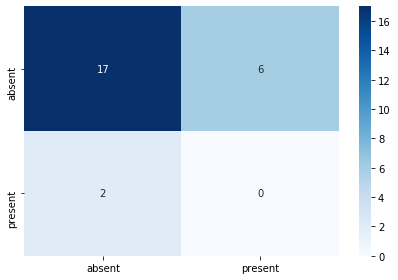

In [208]:
# Evaluate the result
rcv_model.fit(X_train,y_train)
rcv_y_train_pred = rcv_model.predict(X_train)
rcv_y_test_pred = rcv_model.predict(X_test)

print(f'Train score {accuracy_score(rcv_y_train_pred,y_train)}')
print(f'Test score {accuracy_score(rcv_y_test_pred,y_test)}')
plot_confusionmatrix(rcv_y_train_pred,y_train,dom='Train')
plot_confusionmatrix(rcv_y_test_pred,y_test,dom='Test')

In [209]:
rcv_model.best_estimator_

RandomForestClassifier(max_features='sqrt', min_samples_leaf=2,
                       n_estimators=116, n_jobs=-1)

# 3. Optuna
Optuna is “an open-source hyperparameter optimization framework to automate hyperparameter search.” The key features of Optuna include “automated search for optimal hyperparameters” by **Bayesian optimization**, “efficiently search large spaces and prune unpromising trials for faster results,” and “parallelize hyperparameter searches over multiple threads or processes.” 

By default, Optuna uses a technique called Tree-Parzen estimator to select the set of hyper-parameters to be tried next, based on the history of experiments

Except tree-based algorithms, Optuna can also be used to optimize multilayer perceptron.

In [210]:
import sklearn
import optuna
! git clone https://github.com/PrefaceCoding/M3L5
# define the machine learning logic and return the evaluation score here  
def objective(trial):

    df = pd.read_csv("M3L5/kyphosis.csv")
    df["Age"]/=12
    X = df.drop("Kyphosis", axis = 1)
    y = df["Kyphosis"]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

    classifier_name = trial.suggest_categorical("classifier", ["RandomForest"])
    if classifier_name == "RandomForest":
        # The suggested parameter for tuning
        rf_n_estimators = trial.suggest_int("rf_n_estimators", 5, 500, step = 5)
        rf_max_features = trial.suggest_categorical("rf_max_features", [None, 'sqrt', 'log2'])
        rf_min_samples_leaf = trial.suggest_int("min_samples_leaf",1,3)
        # rf_oob_score = trial.suggest_categorical("rf_oob_score", [True, False])
        classifier_obj = sklearn.ensemble.RandomForestClassifier(
            n_estimators = rf_n_estimators, 
            max_features = rf_max_features, 
            min_samples_leaf = rf_min_samples_leaf
            # ,oob_score = rf_oob_score
        )

    score = sklearn.model_selection.cross_val_score(classifier_obj, X_test, y_test, n_jobs=-1, cv=4)
    accuracy = score.mean()
    return accuracy

start = time.time()
if __name__ == "__main__":
    # Create Study object
    study = optuna.create_study(direction="maximize")
    # Optimize the study, use more trials to obtain better result, use less trials to be more cost-efficient
    study.optimize(objective, n_trials=100)
    # Print the result
    print(f"Best score: {study.best_value:0.4f}\n") # Return the best objective value in the study
    print(f"Optimized parameters: {study.best_params}\n")
    print(f"Best trial: {study.best_trial}\n")
end = time.time()
print(f"Elapsed time: {end-start:0.2f} seconds")

fatal: destination path 'M3L5' already exists and is not an empty directory.
[I 2022-03-07 13:40:49,972] A new study created in memory with name: no-name-27d49a46-c11d-4816-aec1-94ee7e13be5c
[I 2022-03-07 13:40:51,059] Trial 0 finished with value: 0.6785714285714286 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 320, 'rf_max_features': 'log2', 'min_samples_leaf': 3}. Best is trial 0 with value: 0.6785714285714286.
[I 2022-03-07 13:40:52,292] Trial 1 finished with value: 0.7202380952380952 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 375, 'rf_max_features': 'sqrt', 'min_samples_leaf': 2}. Best is trial 1 with value: 0.7202380952380952.
[I 2022-03-07 13:40:52,718] Trial 2 finished with value: 0.7202380952380952 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 115, 'rf_max_features': 'log2', 'min_samples_leaf': 2}. Best is trial 1 with value: 0.7202380952380952.
[I 2022-03-07 13:40:54,136] Trial 3 finished with value: 0.678571428571

[I 2022-03-07 13:41:15,749] Trial 31 finished with value: 0.7202380952380952 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 205, 'rf_max_features': None, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.7202380952380952.
[I 2022-03-07 13:41:16,379] Trial 32 finished with value: 0.6785714285714286 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 165, 'rf_max_features': None, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.7202380952380952.
[I 2022-03-07 13:41:16,760] Trial 33 finished with value: 0.7202380952380952 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 80, 'rf_max_features': None, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.7202380952380952.
[I 2022-03-07 13:41:17,244] Trial 34 finished with value: 0.6369047619047619 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 125, 'rf_max_features': None, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.7202380952380952.
[I 2022-03-07 13:41:1

[I 2022-03-07 13:41:40,667] Trial 63 finished with value: 0.7202380952380952 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 305, 'rf_max_features': None, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.7202380952380952.
[I 2022-03-07 13:41:41,522] Trial 64 finished with value: 0.7202380952380952 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 260, 'rf_max_features': None, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.7202380952380952.
[I 2022-03-07 13:41:41,912] Trial 65 finished with value: 0.7202380952380952 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 100, 'rf_max_features': None, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.7202380952380952.
[I 2022-03-07 13:41:42,402] Trial 66 finished with value: 0.7202380952380952 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 100, 'rf_max_features': None, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.7202380952380952.
[I 2022-03-07 13:41:

[I 2022-03-07 13:42:10,840] Trial 95 finished with value: 0.7202380952380952 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 355, 'rf_max_features': None, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.7202380952380952.
[I 2022-03-07 13:42:11,824] Trial 96 finished with value: 0.7202380952380952 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 295, 'rf_max_features': None, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.7202380952380952.
[I 2022-03-07 13:42:12,841] Trial 97 finished with value: 0.7202380952380952 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 305, 'rf_max_features': None, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.7202380952380952.
[I 2022-03-07 13:42:13,123] Trial 98 finished with value: 0.7202380952380952 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 55, 'rf_max_features': None, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.7202380952380952.
[I 2022-03-07 13:42:1

Best score: 0.7202

Optimized parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 375, 'rf_max_features': 'sqrt', 'min_samples_leaf': 2}

Best trial: FrozenTrial(number=1, values=[0.7202380952380952], datetime_start=datetime.datetime(2022, 3, 7, 13, 40, 51, 61637), datetime_complete=datetime.datetime(2022, 3, 7, 13, 40, 52, 290349), params={'classifier': 'RandomForest', 'rf_n_estimators': 375, 'rf_max_features': 'sqrt', 'min_samples_leaf': 2}, distributions={'classifier': CategoricalDistribution(choices=('RandomForest',)), 'rf_n_estimators': IntUniformDistribution(high=500, low=5, step=5), 'rf_max_features': CategoricalDistribution(choices=(None, 'sqrt', 'log2')), 'min_samples_leaf': IntUniformDistribution(high=3, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=1, state=TrialState.COMPLETE, value=None)

Elapsed time: 83.75 seconds


### By using Optuna, the train data model has 87% accuracy and the test data model has a 76% accuracy

### The result is better than those performed by GridSearchCV and RandomSearchCV!!

In [211]:
pd.set_option('display.max_colwidth', -1)
performance_df = pd.DataFrame({'Optuna':[study.best_value, study.best_params]}, index=['Best score', 'Optimized parameter'])
performance_df

,Optuna
Best score,0.720238
Optimized parameter,"{'classifier': 'RandomForest', 'rf_n_estimators': 375, 'rf_max_features': 'sqrt', 'min_samples_leaf': 2}"


In [253]:
gcv_optimized_parameters = gcv.best_estimator_
rcv_optimized_parameters = rcv.best_estimator_
print(f"For GridSearchCV, best score: {accuracy_score(gcv_y_test_pred,y_test)}, optimized parameters: {rcv_optimized_parameters}")
print(f"For RandomSearchCV: best score: {accuracy_score(rcv_y_test_pred,y_test)}, optimized parameters: {gcv_optimized_parameters}")

For GridSearchCV, best score: 0.72, optimized parameters: RandomForestClassifier(max_features='sqrt', min_samples_leaf=2,
                       n_estimators=116, n_jobs=-1)
For RandomSearchCV: best score: 0.68, optimized parameters: RandomForestClassifier(max_features=None, min_samples_leaf=3, n_estimators=200,
                       n_jobs=-1)


In [247]:
# performance_df['GridSearchCV'] = [accuracy_score(gcv_y_test_pred,y_test), gcv_optimized_parameters]
# performance_df['RandomSearchCV'] = [accuracy_score(rcv_y_test_pred,y_test), rcv_optimized_parameters]
# performance_df